In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
# load pretrained word embeddings:glove.6B.100d.txt


filename = 'glove.6B.100d.txt' ## this file 'glove.6B.100d.txt' is composed of lines with each line containning a word and its embedding.

## store words and their embeddings in separate lists, then turn embedding list to np array.

def loadGloVe(filename):
    vocab = []
    embd = []
    #with open (filename,'r') as f:
        #emb_size = len(f.readline().strip().split(' '))-1
    #vocab.append('unk') #load unknown words
    #embd.append([0]*emb_size)
    
    file = open(filename,'r')
    for line in file:
        row = line.strip().split(' ')
        vocab.append(row[0])
        embd.append(row[1:])
    print('Loaded GloVe!')
    file.close()
    return vocab,embd

vocab,embd = loadGloVe(filename)
vocab_size = len(vocab)
embedding_dim = len(embd[0])
embedding = np.asarray(embd)


Loaded GloVe!


In [5]:
embedding = embedding.astype(np.float64) # the glove vectors loaded above are of dtype '<U21', which means they are strings and therefore need to be transformed to float

In [8]:
vecs_pca = PCA(n_components = 2,random_state = 42).fit_transform(embedding)

In [9]:
# find the most similar words of the 20 newsgroups categories
from scipy.spatial.distance import cosine
l_category = ['graphics','windows','ibm','hardware','mac','forsale','autos','motorcycles','baseball',
           'hockey','guns','mideast','crypt','electronics','med','space','atheism','christian','religion',
           'politics','university','sport']
cat_idx = [] # index of words in l_category in the pre-trained vectors.
cat_embed = []# embeddings corresponding to words in l_category.

embed_similar = []# embeddings of words most similar to cat_embed.
unks = []# so as to count how many words in l_category don't appear in the pre-trained vectors.
l_idx = cat_idx # index of category words and similar words in the pre-trained vectors
for word in l_category:
    if word not in vocab:
        unks.append(word) 
    else:
        cat_idx.append(vocab.index(word)) 
for idx in cat_idx:
    cat_embed.append(embedding[idx])

for embed in cat_embed:
    for i,item in enumerate(embedding):
        if cosine(embed,item)<0.35:
            if (embed != item).any():
                embed_similar.append(item)
                l_idx.append(i)

In [10]:
print (len(unks))
print (len(embed_similar))
print (len(l_idx))

1
213
234


In [11]:
word_plt = []
pca_plt = []
for i in l_idx:
    word_plt.append(vocab[i])
    pca_plt.append(vecs_pca[i])

In [12]:
maxx = np.max(list(zip(*pca_plt))[0])
maxy = np.max(list(zip(*pca_plt))[1])

minx = np.min(list(zip(*pca_plt))[0])
miny = np.min(list(zip(*pca_plt))[1])

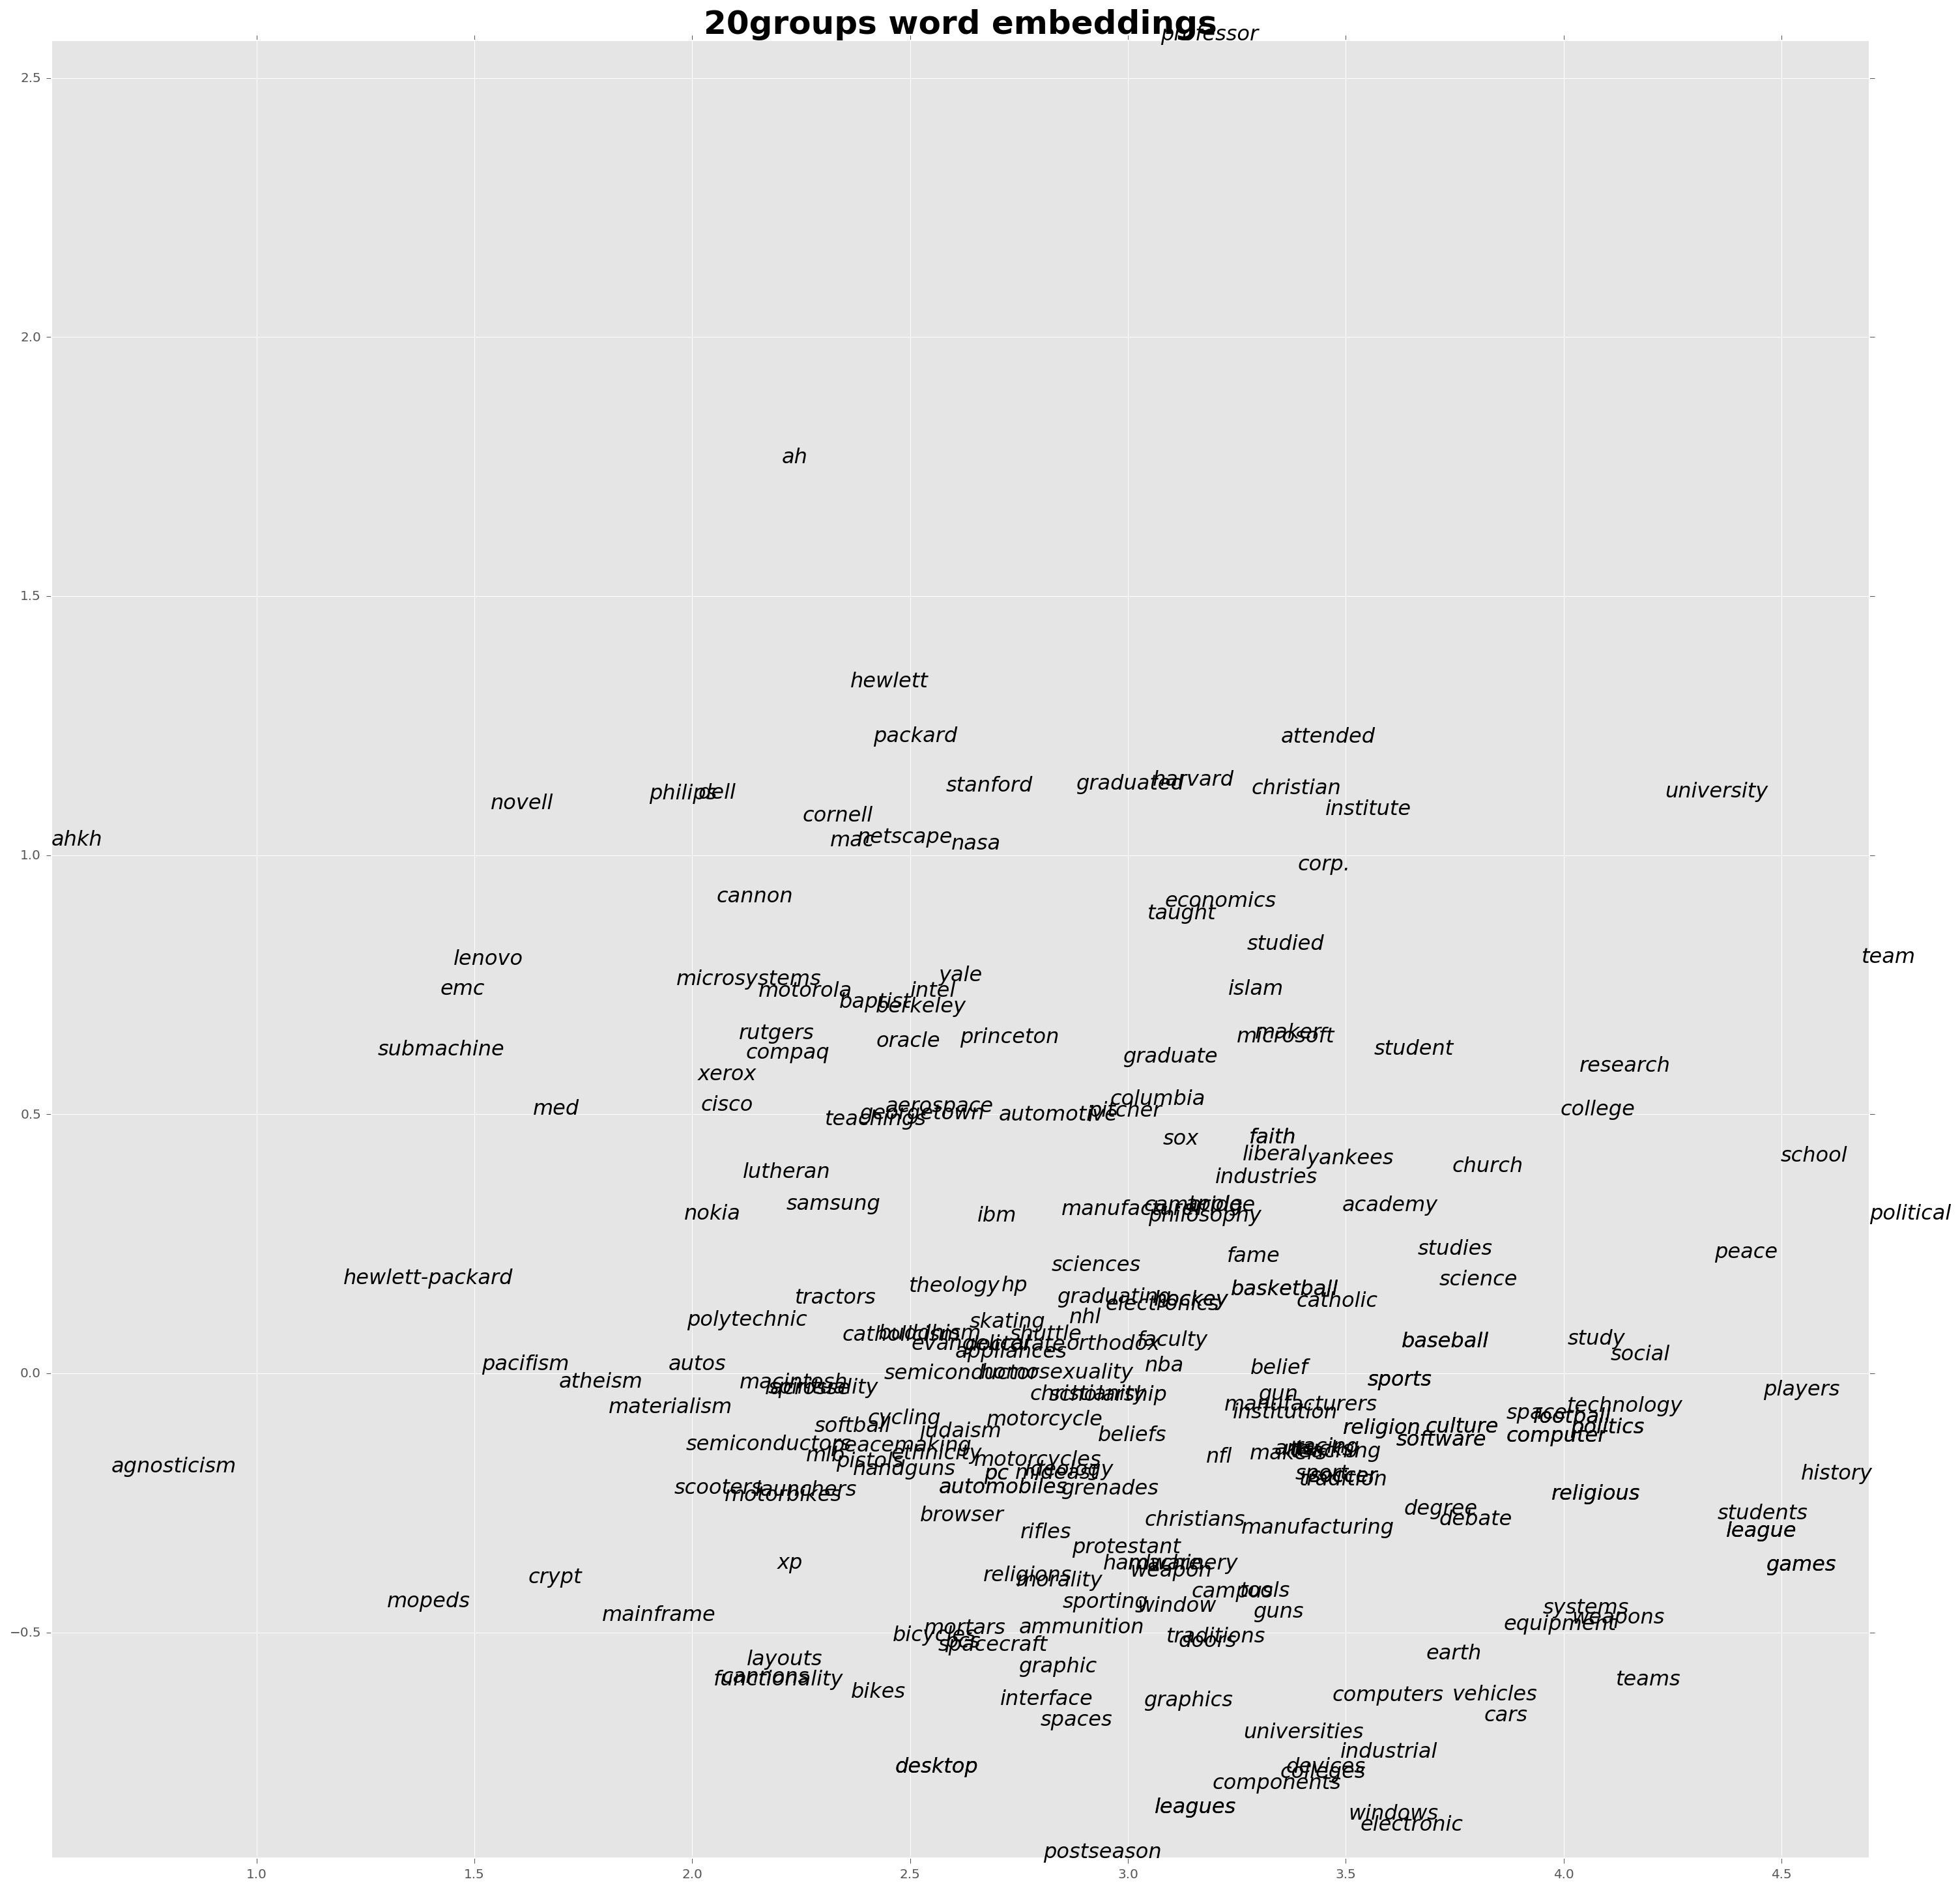

In [14]:
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

fig = plt.figure(figsize = (25,25))
#fig.suptitle()
ax = fig.add_subplot(111)
for i in range(len(l_idx)):
    ax.text(pca_plt[i][0],pca_plt[i][1],word_plt[i],style = 'italic',fontsize =16)
ax.axis([minx,maxx,miny,maxy])
ax.set_title('20groups word embeddings', fontsize = 25, fontweight = 'bold')
plt.show()